# Enunciado
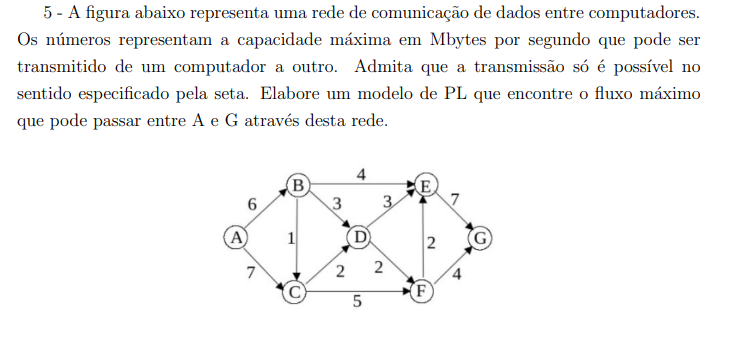

In [ ]:
import gurobipy as gp
from gurobipy import GRB

#  Modelo 
m = gp.Model("Fluxo_Maximo")

#  Entradas 
FONTE, SUMIDOURO = 'A', 'G'

# Arcos e capacidades (Mbytes/s)
arcos, capacidade = gp.multidict({
    ('A', 'B'): 6, ('A', 'C'): 7,
    ('B', 'C'): 1, ('B', 'D'): 3, ('B', 'E'): 4,
    ('C', 'D'): 2, ('C', 'F'): 5,
    ('D', 'E'): 3, ('D', 'F'): 2,
    ('E', 'F'): 2, ('E', 'G'): 7,
    ('F', 'G'): 4
})

# Conjunto de nós únicos
nos = sorted(set(i for i, j in arcos) | set(j for i, j in arcos))

#  Variáveis 
fluxo = m.addVars(arcos, lb=0, name="Fluxo")

#  Função Objetivo 
m.setObjective(fluxo.sum(FONTE, '*'), GRB.MAXIMIZE)

# Restrições 
# Capacidade máxima dos arcos
m.addConstrs((fluxo[i, j] <= capacidade[i, j] for i, j in arcos), name="Capacidade")

# Conservação de fluxo (para nós intermediários)
for k in nos:
    if k not in [FONTE, SUMIDOURO]:
        m.addConstr(fluxo.sum('*', k) == fluxo.sum(k, '*'), name=f"Conservacao_{k}")

# Otimização 
m.optimize()

#  Resultados 
if m.status == GRB.OPTIMAL:
    print("\n" + "-"*50)
    print("SOLUÇÃO ÓTIMA ENCONTRADA")
    print("-"*50)
    print(f"Fluxo Máximo Total de {FONTE} → {SUMIDOURO}: {m.objVal:,.2f} Mbytes/s")
    print("-"*50)
    print("Fluxo Ótimo por Arco:")

    for i, j in arcos:
        if fluxo[i, j].x > 1e-6:
            print(f"  - {i} → {j}: {fluxo[i, j].x:5.2f} / {capacidade[i, j]} (cap.)")

    print("-"*50)
elif m.status == GRB.INFEASIBLE:
    print("\nModelo infactível: não há caminho possível entre fonte e sumidouro.")
else:
    print("\nNenhuma solução ótima encontrada.")


# RESULTADOS
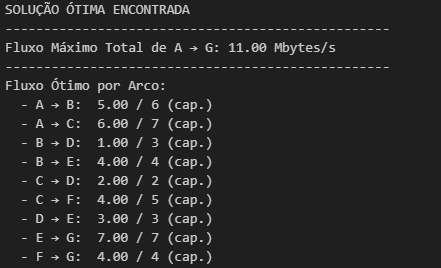